## Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import numpy as np
from matplotlib import font_manager, rc
from tqdm import tqdm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## Data load

In [2]:
path = '../data/'
data = pd.read_csv(path +'201901-202003.csv')
gc.collect()

7

### Get group data

In [3]:
group_data = data.loc[:,['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM', 'AMT']].groupby(['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM']).sum()
group_data = np.log(group_data)

### Get error_group, uncomplete_group

In [4]:
days = group_data.reset_index()['REG_YYMM'].unique().astype('str') # REG_YYMM를 string으로 변환
citys = data.CARD_SIDO_NM.unique() # citys : 지역(시도)의 이름들을 list로 저장
std_list = []

error_group = [] # std가 0.3이상인 그룹 저장
uncomplete_group = [] # 모든 월별 데이터가 없는 그룹 저장


for city in tqdm(citys):
    clsses = data[data.CARD_SIDO_NM == city].STD_CLSS_NM.unique()
    # 특정지역에서는 업종이 없는 경우도 있음.
    # 지역별로 업종 list를 새로 생성
    for clss in clsses:
        y = group_data.loc[city, clss,:].values.reshape(-1)
        if len(y) == len(days):
            
            x = np.arange(12).reshape(-1,1)
            y_pred = np.zeros(12)
            y_pred[:] = y[:12].mean()
            std_list.append(y[:12].std())
            
            if 0.3 < y[:12].std():
                error_group.append((city, clss))
            else: 
                pass
        else:
            uncomplete_group.append((city, clss))
del group_data
gc.collect()

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:31<00:00,  1.87s/it]


0

In [5]:
error_group[:10] # std가 0.3을 넘는 그룹 중 10개만 보여주기

[('강원', '골프장 운영업'),
 ('강원', '관광 민예품 및 선물용품 소매업'),
 ('강원', '전시 및 행사 대행업'),
 ('강원', '호텔업'),
 ('강원', '휴양콘도 운영업'),
 ('강원', '여행사업'),
 ('강원', '자동차 임대업'),
 ('강원', '기타 수상오락 서비스업'),
 ('강원', '내항 여객 운송업'),
 ('경기', '골프장 운영업')]

In [6]:
uncomplete_group[:10] # 모든 월별 데이터가 없는 그룹 중 10개만 보여주기

[('강원', '면세점'),
 ('강원', '버스 운송업'),
 ('강원', '택시 운송업'),
 ('강원', '그외 기타 분류안된 오락관련 서비스업'),
 ('경기', '내항 여객 운송업'),
 ('경기', '그외 기타 분류안된 오락관련 서비스업'),
 ('경남', '자동차 임대업'),
 ('경북', '그외 기타 분류안된 오락관련 서비스업'),
 ('경북', '여행사업'),
 ('경북', '내항 여객 운송업')]

### Get [group_city_clss_time]


In [7]:
# 데이터를 날짜, 도시, 업종으로 groupby
# 인덱싱을 편하게 하기 위해 row를 CARD_SIDO_NM,	STD_CLSS_NM, REG_YYMM 3개의 level로 표현
group_city_clss_time = data.loc[:, ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]\
                           .groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT']\
                           .sum()

group_city_clss_time = pd.DataFrame(group_city_clss_time)
gc.collect()
# group_data는 'AMT'하나만 column으로 갖는다.
#group_city_clss_time = np.log(group_city_clss_time)
group_city_clss_time

AMT
CARD_SIDO_NM STD_CLSS_NM REG_YYMM           
강원           건강보조식품 소매업  201901    148354746
                         201902    146715871
                         201903    109439025
                         201904    106548473
                         201905    148115738
...                                      ...
충북           휴양콘도 운영업    201911    124117555
                         201912    139568962
                         202001    222073112
                         202002     47085830
                         202003     12733490

[9438 rows x 1 columns]

### Get [group_city_clss_time_count]


In [8]:
group_city_clss_time_count = data.loc[:, ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]\
                           .groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT']\
                           .count()

group_city_clss_time_count = pd.DataFrame(group_city_clss_time_count)
group_city_clss_time_count.columns = ['COUNT']
gc.collect()
group_city_clss_time_count

COUNT
CARD_SIDO_NM STD_CLSS_NM REG_YYMM       
강원           건강보조식품 소매업  201901       94
                         201902      104
                         201903       86
                         201904      104
                         201905      108
...                                  ...
충북           휴양콘도 운영업    201911      319
                         201912      349
                         202001      484
                         202002      127
                         202003       35

[9438 rows x 1 columns]

### Get [group_city_clss]


In [9]:
group_city_clss = pd.DataFrame(data.loc[:, ['CARD_SIDO_NM',
                          'STD_CLSS_NM',
                          'AMT']].groupby(['CARD_SIDO_NM',
                                          'STD_CLSS_NM'])['AMT'].sum())
#group_city_clss['AMT'] = np.log(group_city_clss['AMT'])
#group_city_clss = group_city_clss.reset_index() #index를 column에 포함시키기
group_city_clss

AMT
CARD_SIDO_NM STD_CLSS_NM                        
강원           건강보조식품 소매업               1820824382
             골프장 운영업                 51290887138
             과실 및 채소 소매업             16675489268
             관광 민예품 및 선물용품 소매업         457212008
             그외 기타 분류안된 오락관련 서비스업         177000
...                                          ...
충북           피자 햄버거 샌드위치 및 유사 음식점업   21294163365
             한식 음식점업                327145423793
             호텔업                       530914357
             화장품 및 방향제 소매업            9175488855
             휴양콘도 운영업                 2414736980

[650 rows x 1 columns]

### Make Plot Function

In [10]:
def plot_groups_by_month(group_list, log = False):
    plt.figure(figsize = (15,30))
    for index in range(len(group_list)):
        all_month = ['201901', '201902', '201903', '201904', '201905', '201906', '201907',
                 '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']
        new_y = {}
        city, clss = group_list[index]
        for month in all_month:
            if month in list(map(str, group_city_clss_time.loc[city, clss].index)):
                new_y[month] = int(group_city_clss_time.loc[city, clss, int(month)])
            else:
                new_y[month] = 0
                
        new_y = list(new_y.values())
        if log == True:
            new_y = np.log(new_y)
            
        plt.plot(all_month, new_y, 'o-', label = group_list[index])
        plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize = 15)
        #plt.title(group_list[index][0])
        plt.xticks(rotation = 45, fontsize = 15)
    plt.show()
    
def plot_city_clss_by_month(city, clss, color = 'red', count_ratio = 1):
    all_month = ['201901', '201902', '201903', '201904', '201905', '201906', '201907',
                 '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']
    new_amt = {}
    new_count = {}
    mean_amt = group_city_clss_time.loc[city, clss].mean()
    print('<AMT인 년월>')
    zero_month = []
    for month in all_month:
        if month in list(map(str, group_city_clss_time.loc[city, clss].index)):
            new_amt[month] = int(group_city_clss_time.loc[city, clss, int(month)])
            new_count[month] = int(group_city_clss_time_count.loc[city, clss, int(month)]) * mean_amt/10 * count_ratio
        else:
            new_amt[month] = 0
            new_count[month] = 0
            zero_month.append(month)
    print(zero_month)
    plt.plot(all_month, list(new_amt.values()), 'o-', color = color, label = 'AMT')
    plt.plot(all_month, list(new_count.values()), 'o-', label  = 'COUNT')
    plt.legend()
    plt.title(city + ' ' + clss)
    plt.xticks(rotation = 45)
    plt.show()

### Plot all uncomplete_group in orginal scale

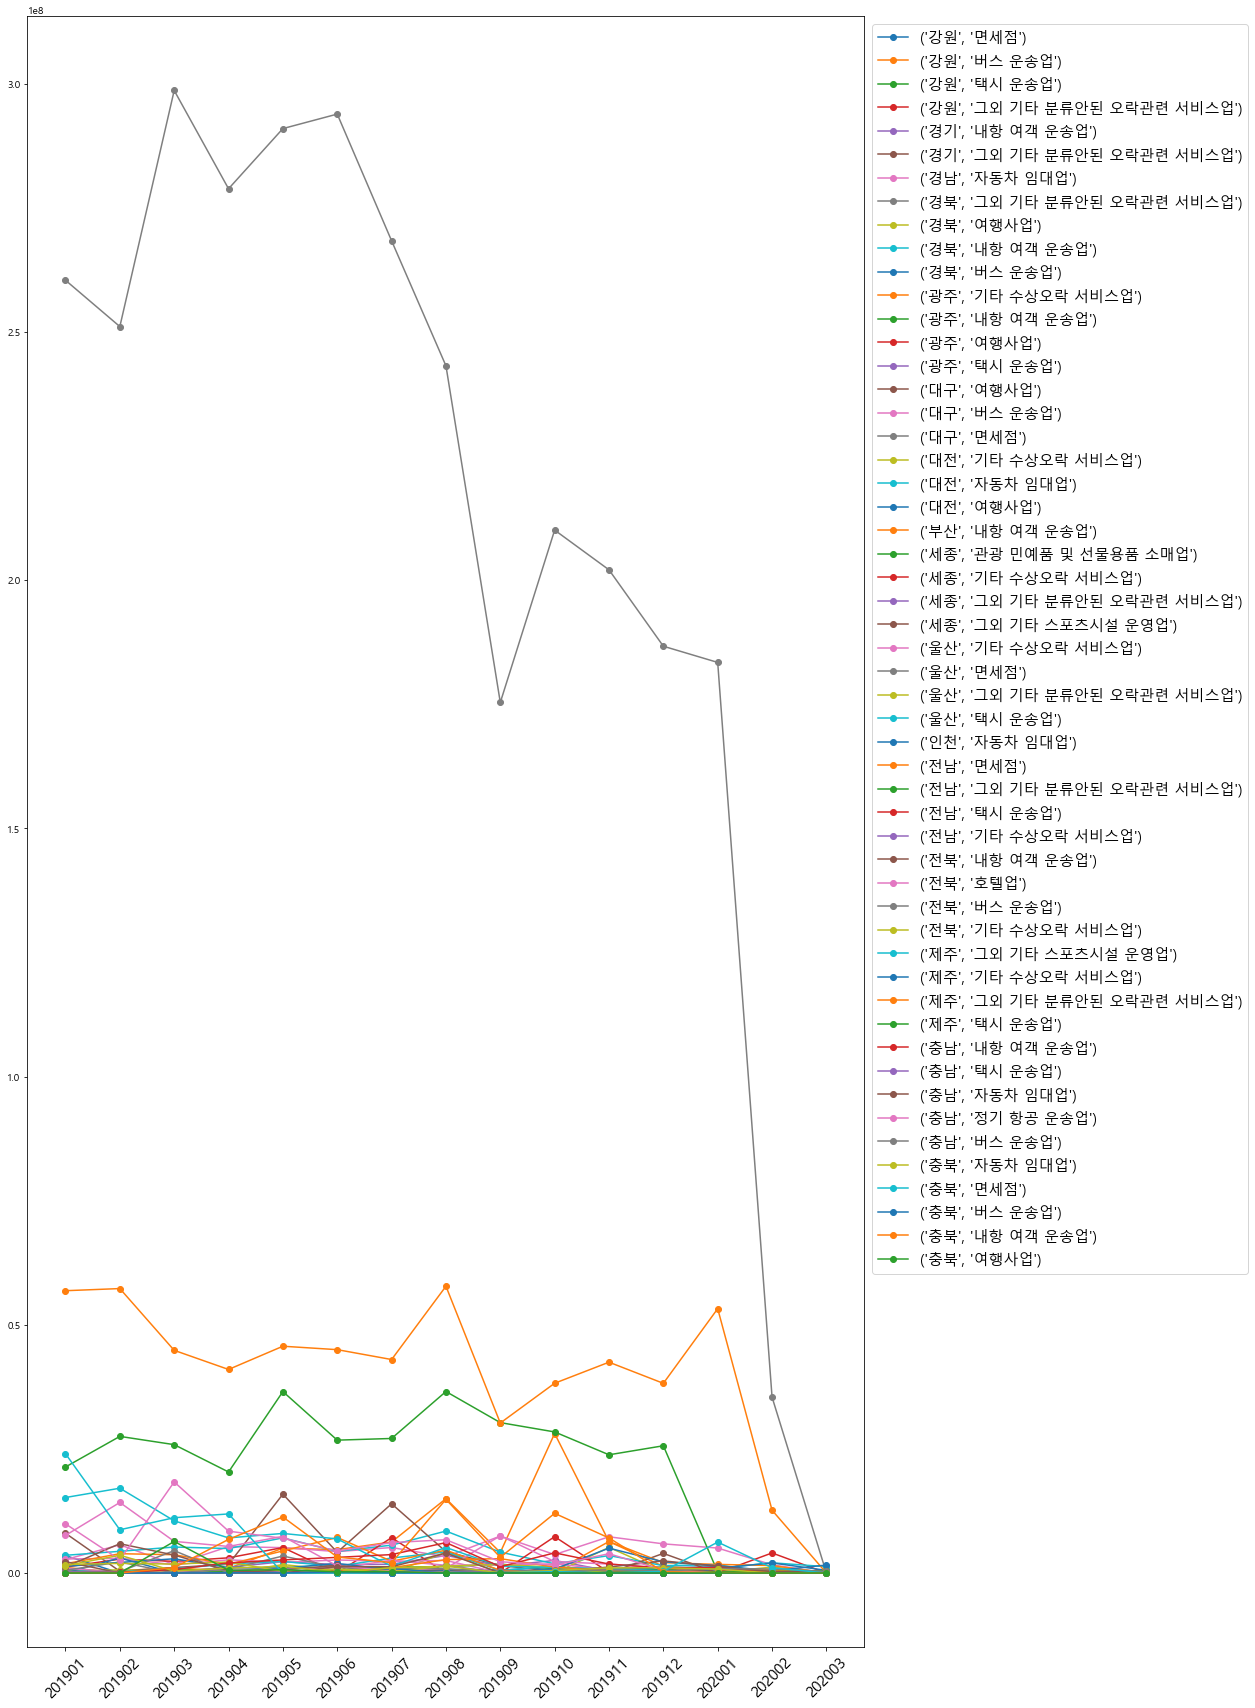

In [12]:
plot_groups_by_month(uncomplete_group)

### Plot all uncomplete_group in log sclae

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


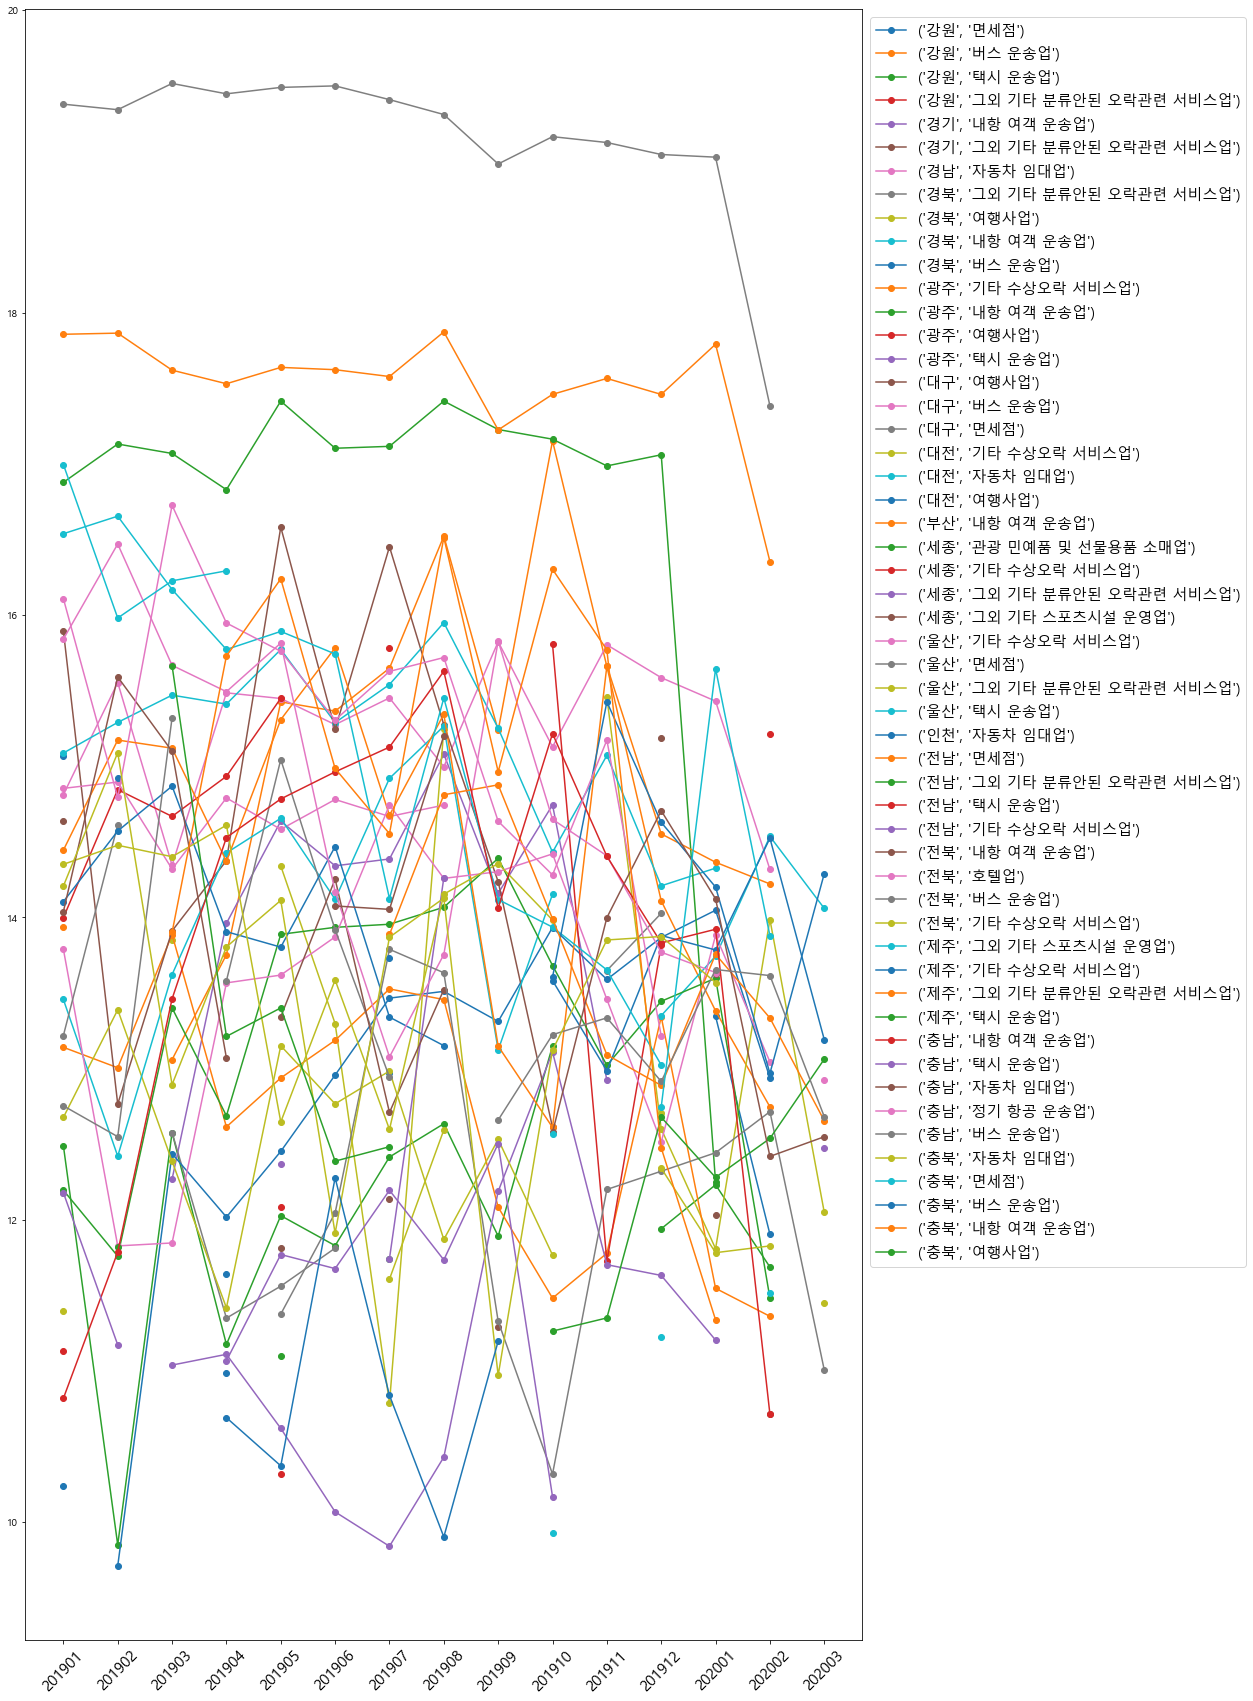

In [13]:
plot_groups_by_month(uncomplete_group, log = True)

In [18]:
len(uncomplete_group)

53

<AMT인 년월>
[]


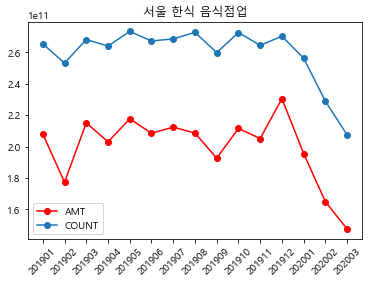

In [15]:
plot_city_clss_by_month('서울','한식 음식점업', count_ratio = 0.0003)

### Plot each uncomplete_group in log sclae

<AMT인 년월>
['201902', '201903', '201905', '201906', '201908', '201909', '201910', '201911', '201912', '202003']


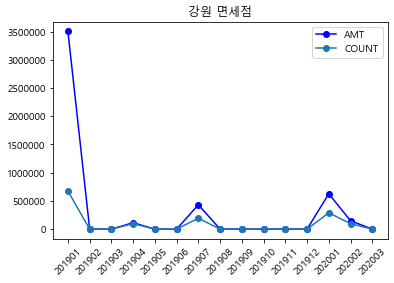

'\n4월 : 0\n7월 : 0 or 19년7월 /2\n'

In [94]:
i = 0
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 0 or 19년7월 /2
'''

<AMT인 년월>
['201902', '202003']


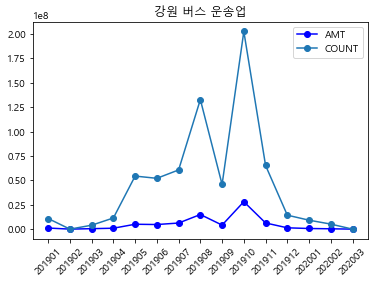

'\n4월 : 0\n7월 : 19년 7월 / 2\n'

In [95]:
i = 1
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 19년 7월 / 2
'''

<AMT인 년월>
['201911', '202003']


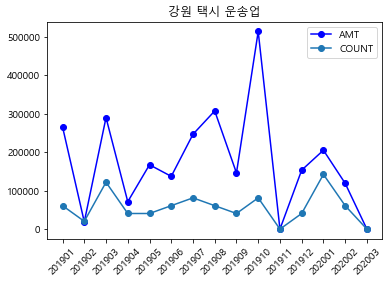

'\n\n4월 : 0\n7월 : 19년 7월 / 2\n\n'

In [97]:
i = 2
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''

4월 : 0
7월 : 19년 7월 / 2

'''

<AMT인 년월>
['201901', '201902', '201903', '201904', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']


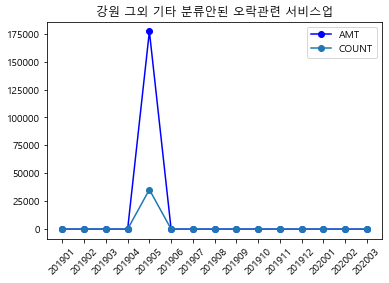

'\n1909, 1910 데이터가 특이함\n\n4월 : 0\n7월 : 0\n\n'

In [98]:
i = 3
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
1909, 1910 데이터가 특이함

4월 : 0
7월 : 0

'''

<AMT인 년월>
['201901', '201902', '201912', '202001', '202002']


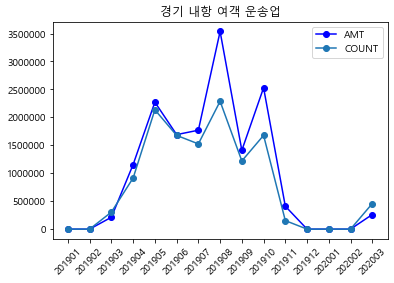

'\n주기성을 보임\n여객 운송업은 코로나 영향을 많이 받을 것으로 예상됨\n\n4월 : 3월 데이터\n7월 : 작년 7월 / 2 , 작년 7월 / 4\n\n'

In [99]:
i = 4
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
주기성을 보임
여객 운송업은 코로나 영향을 많이 받을 것으로 예상됨

4월 : 3월 데이터
7월 : 작년 7월 / 2 , 작년 7월 / 4

'''

<AMT인 년월>
['201901', '201902', '201903', '201904', '201906', '201908', '201910', '201911', '201912', '202001', '202003']


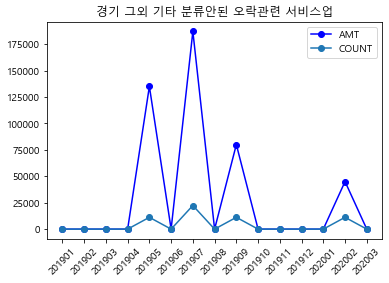

'\n주기성을 보임 x\n4월 : 0\n7월 : 전체 평균 or 0\n'

In [100]:
i = 5
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
주기성을 보임 x
4월 : 0
7월 : 전체 평균 or 0
'''

<AMT인 년월>
['202003']


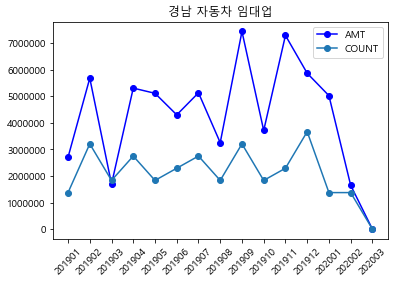

'\n주기성을 보임 x\n\n4월 :  3월\n7월 :  19년7월/ 2, 19년 7월/4\n\n'

In [101]:
i = 6
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
주기성을 보임 x

4월 :  3월
7월 :  19년7월/ 2, 19년 7월/4

'''

<AMT인 년월>
['201902', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']


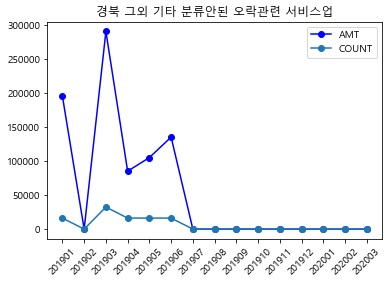

'\n4월 : 0으로 모두예측\n7월 : 0\n\n'

In [102]:
i = 7
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 모두예측
7월 : 0

'''

<AMT인 년월>
['201902', '201904', '201909', '201910']


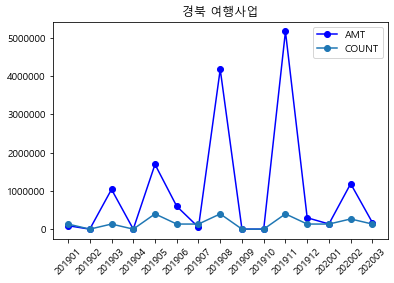

'\n4월 : 0\n7월 : \n0으로 모두예측\nor\n0~ 1000000사이의 값으로 예측\n'

In [103]:
i = 8
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 
0으로 모두예측
or
0~ 1000000사이의 값으로 예측
'''

<AMT인 년월>
['202002', '202003']


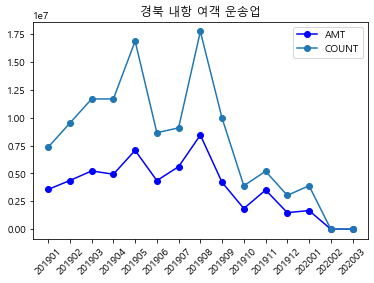

'\n4월 : 0으로 모두예측\n7월 : 0\n'

In [104]:
i = 9
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 모두예측
7월 : 0
'''

<AMT인 년월>
['201901', '202003']


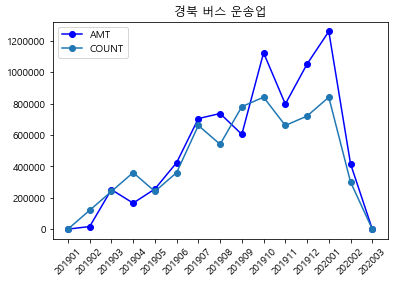

'\n4월 : 0\n7월 :\n0으로 모두예측\nor\n2월 / 2\n'

In [105]:
i = 10
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 :
0으로 모두예측
or
2월 / 2
'''

<AMT인 년월>
['202003']


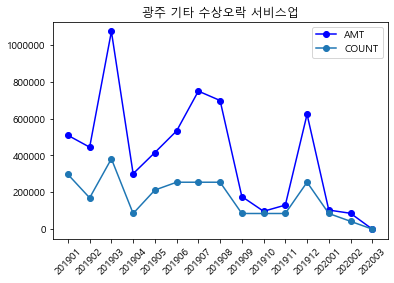

'\n4월 : 0으로 예측\n7월 : 19년 10월 데이터로 7월 예측\n'

In [106]:
i = 11
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측
7월 : 19년 10월 데이터로 7월 예측
'''

<AMT인 년월>
['202002', '202003']


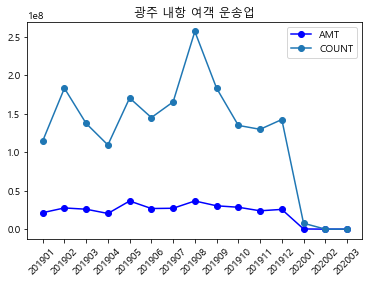

'\n4월 : 0으로 예측\n7월 : 전체 평균 / 2 \n'

In [107]:
i = 12
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측
7월 : 전체 평균 / 2 
'''

<AMT인 년월>
['201906', '201908', '201909', '202001', '202003']


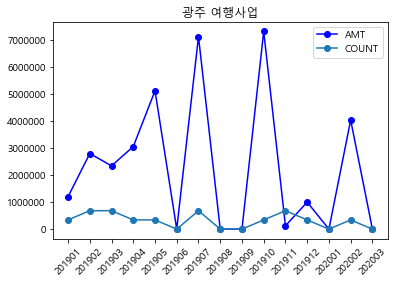

'\n4월 : 0으로 예측 \n7월 : 19년 7월 / 2 \n'

In [108]:
i = 13
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 19년 7월 / 2 
'''

<AMT인 년월>
['201901', '201902', '202002', '202003']


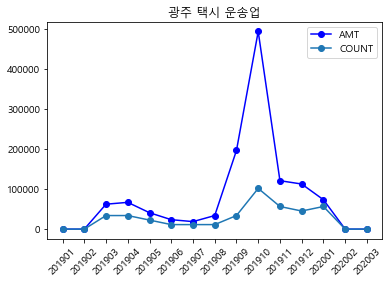

'\n4월 : 0으로 예측 \n7월 : 0으로 예측 or 19년 7월 / 2\n'

In [109]:
i = 14
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 0으로 예측 or 19년 7월 / 2
'''

<AMT인 년월>
['201911', '202001', '202002', '202003']


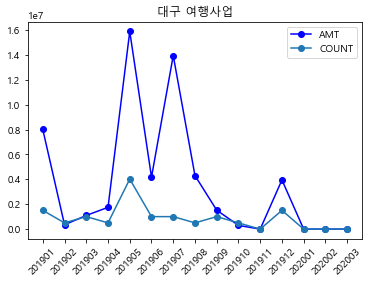

'\n4월 : 0으로 예측 \n7월 : 19년 7월 / 2\n'

In [110]:
i = 15
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 19년 7월 / 2
'''

<AMT인 년월>
['201909', '201910', '201911', '201912', '202001', '202002', '202003']


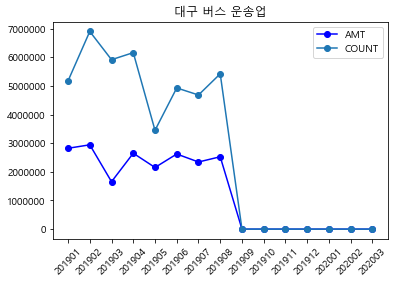

'\n4월 : 0으로 예측 \n7월 : 0\n'

In [111]:
i = 16
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 0
'''

<AMT인 년월>
['202003']


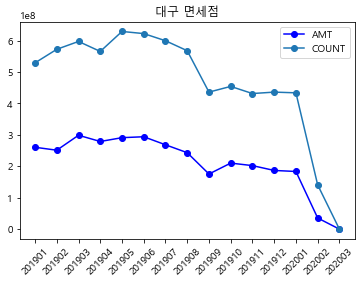

'\n4월 : 0으로 예측 \n7월 : 20년 2월로 예측\n'

In [150]:
i = 17
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue', cont_ratio = 0.1)

'''
4월 : 0으로 예측 
7월 : 20년 2월로 예측
'''

<AMT인 년월>
['201911', '202001', '202002']


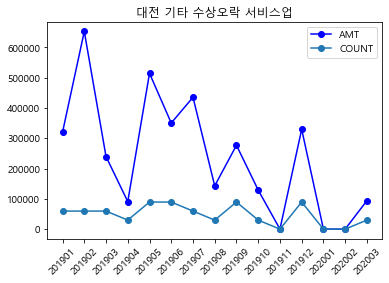

'\n4월 : 0으로 예측 \n7월 : 19년 4월로 예측\n'

In [151]:
i = 18
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 19년 4월로 예측
'''

<AMT인 년월>
['201911']


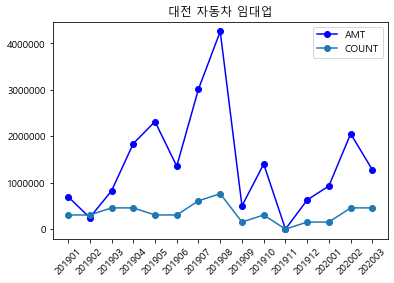

'\n4월 : 0으로 예측 \n7월 : 19년 7월 / 2\n'

In [152]:
i = 19
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 19년 7월 / 2
'''

<AMT인 년월>
['201901', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']


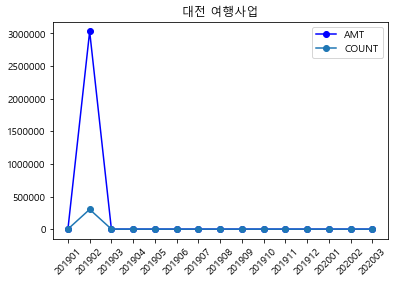

'\n4월 : 0으로 예측 \n7월 : 0\n'

In [153]:
i = 20
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 0
'''

<AMT인 년월>
['202003']


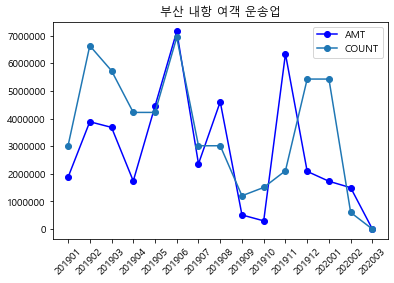

'\n4월 : 0으로 예측 \n7월 : 19년 7월 / 2\n'

In [116]:
i = 21
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 19년 7월 / 2
'''

<AMT인 년월>
['202003']


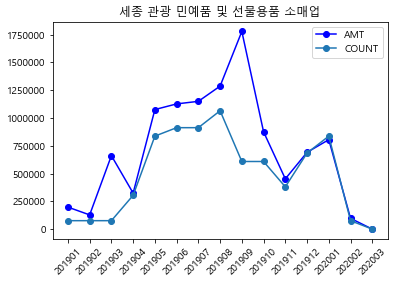

'\n4월 : 0으로 예측 \n7월 : 0으로 예측 or 1907/2\n'

In [117]:
i = 22
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 0으로 예측 or 1907/2
'''

<AMT인 년월>
['201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']


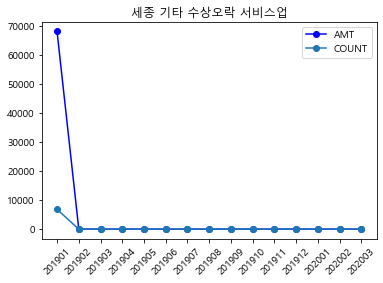

'\n4월 : 0\n7월 : 0\n'

In [118]:
i = 23
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 0
'''

<AMT인 년월>
['201901', '201902', '201903', '201904', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']


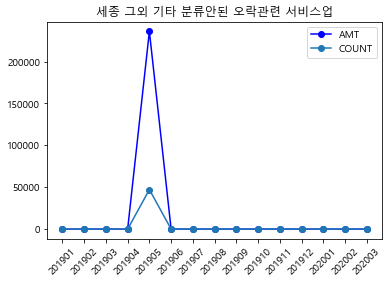

'\n4월 : 0\n7월 :0\n'

In [119]:
i = 24
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 :0
'''

<AMT인 년월>
['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202002', '202003']


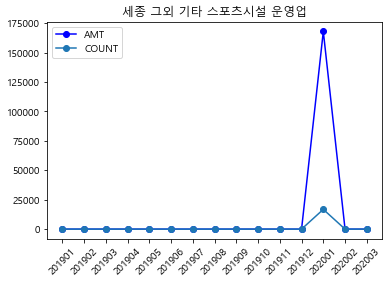

'\n4월 : 0\n7월 :0\n'

In [120]:
i = 25
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 :0
'''

<AMT인 년월>
['202003']


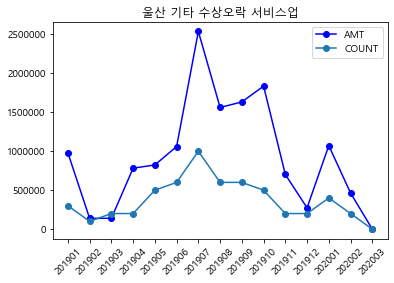

'\n4월 : 0\n7월 : 0으로 예측 or 1907/2\n'

In [121]:
i = 26
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 0으로 예측 or 1907/2
'''

<AMT인 년월>
['201903', '201908', '201909', '201910', '202001', '202002', '202003']


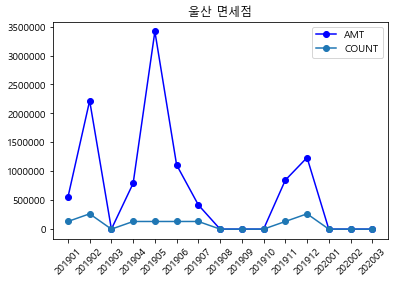

'\n4월 : 0으로 예측 \n7월 : 0으로 예측 or 1907/2\n'

In [122]:
i = 27
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 0으로 예측 or 1907/2
'''

In [ ]:
i = 28
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0으로 예측 
7월 : 0
'''

<AMT인 년월>
['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201911', '202001', '202003']


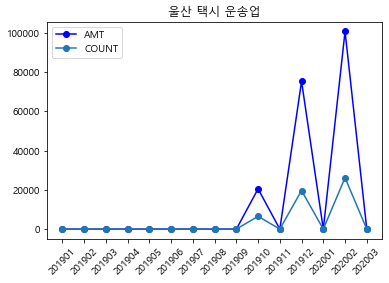

'\n4월 : 0\n7월 : 0\n'

In [124]:
i = 29
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 0
'''

<AMT인 년월>
['201909']


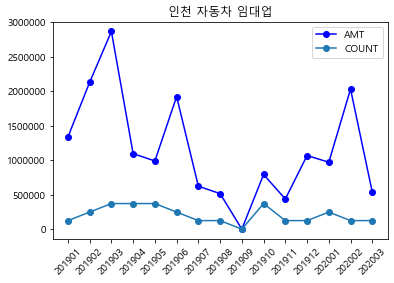

'\n4월 : 전체 평균\n7월 : 전체 평균\n'

In [125]:
i = 30
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 전체 평균
7월 : 전체 평균
'''

<AMT인 년월>
['202003']


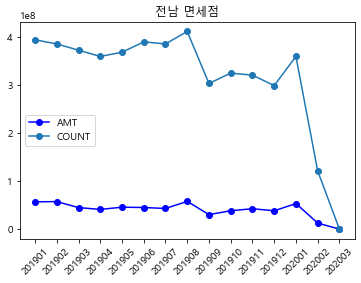

'\n4월 : 0\n7월 : 0 or 1907/4 or 1907/8\n'

In [126]:
i = 31
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 0 or 1907/4 or 1907/8
'''

<AMT인 년월>
['201901', '201903', '201904', '201906', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']


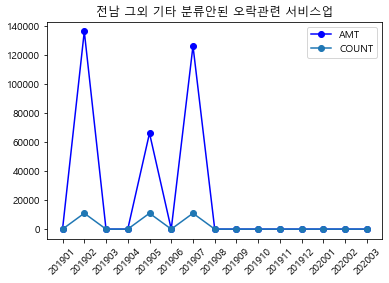

'\n4월 : 0\n7월 : 0 or 전체 평균\n'

In [127]:
i = 32
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 0 or 전체 평균
'''

<AMT인 년월>
['201901', '201902', '201903', '201904', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']


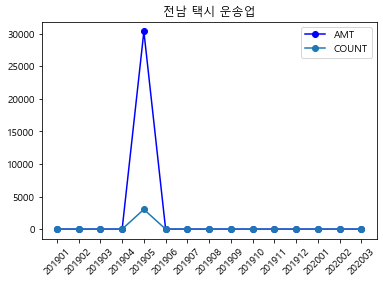

'\n4월 : 0\n7월 : 0\n'

In [128]:
i = 33
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 0
'''

<AMT인 년월>
['201901', '201902', '201903', '201904', '201905', '201906', '201909', '201910', '201911', '201912', '202001', '202002', '202003']


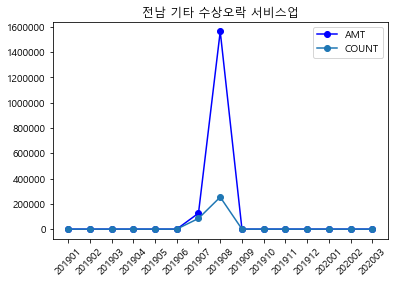

'\n4월 : 0\n7월 : 0\n'

In [129]:
i = 34
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 0
'''

<AMT인 년월>
['201902', '201903', '201904', '201909', '201910', '201911', '201912', '202002', '202003']


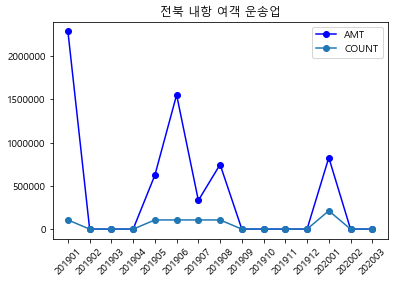

'\n4월 : 0\n7월 : 0 or 전체 평균\n'

In [130]:
i = 35
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 0 or 전체 평균
'''

<AMT인 년월>
['202002']


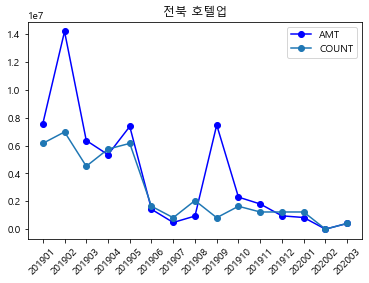

'\n4월 : 0\n7월 : 0 or 19년 7월 그대로 사용\n'

In [131]:
i = 36
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 0 or 19년 7월 그대로 사용
'''

<AMT인 년월>
['201904']


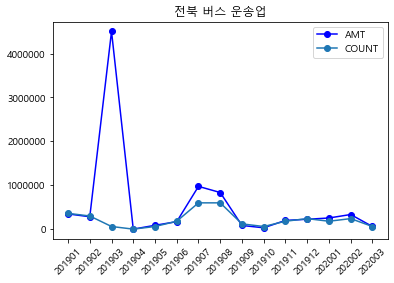

'\n4월 : 0\n7월 :  19년 7월 /2 or 4\n'

In [132]:
i = 37
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 :  19년 7월 /2 or 4
'''

<AMT인 년월>
['201911', '202003']


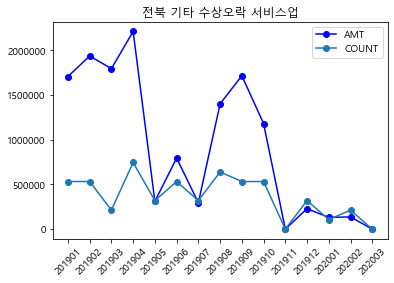

'\n4월 : 0\n7월 : \n'

In [133]:
i = 38
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 : 0
7월 : 
'''

<AMT인 년월>
['202001', '202002', '202003']


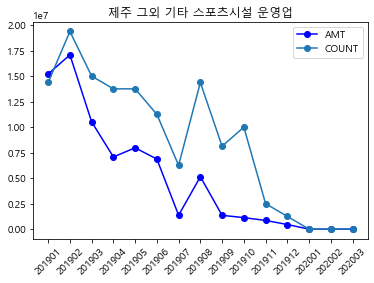

'\n4월 :\n7월 : \n'

In [134]:
i = 39
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['201901', '201902', '201903', '201905', '201906', '201908', '201909']


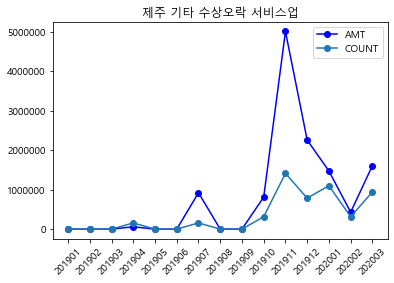

'\n4월 :\n7월 : \n'

In [135]:
i = 40
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['201901', '201902', '201903', '201904', '201905', '201906']


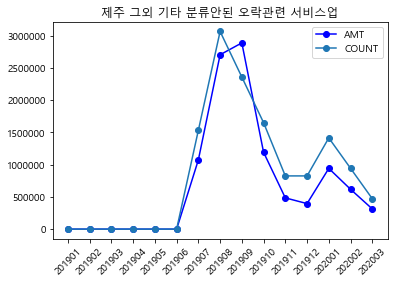

'\n4월 :\n7월 : \n'

In [136]:
i = 41
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909']


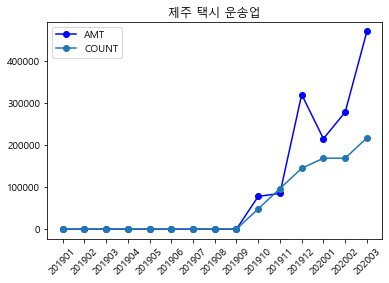

'\n4월 :\n7월 : \n'

In [137]:
i = 42
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['202003']


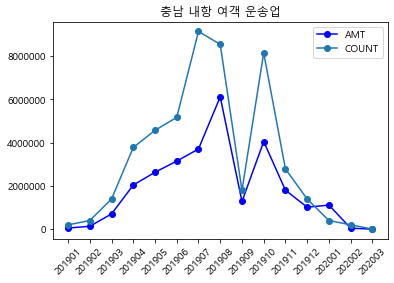

'\n4월 :\n7월 : \n'

In [138]:
i = 43
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['201903', '201911', '201912', '202001', '202002', '202003']


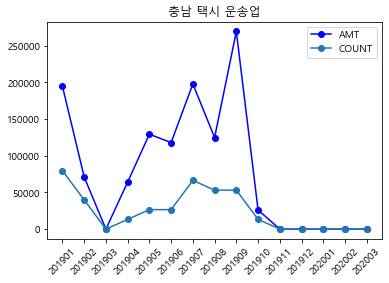

'\n4월 :\n7월 : \n'

In [139]:
i = 44
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['201905', '201909']


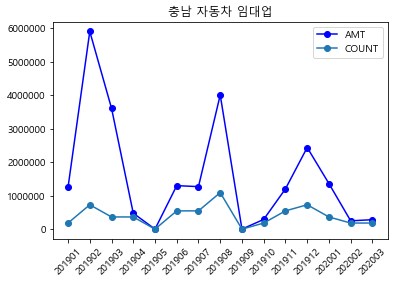

'\n4월 :\n7월 : \n'

In [140]:
i = 45
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['202001', '202002', '202003']


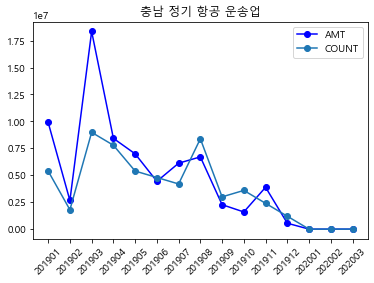

'\n4월 :\n7월 : \n'

In [141]:
i = 46
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908']


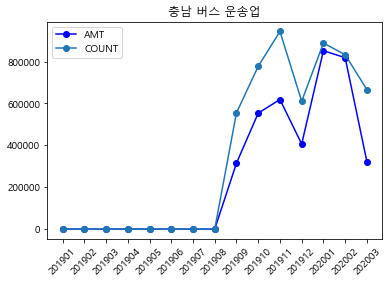

'\n4월 :\n7월 : \n'

In [142]:
i = 47
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['202002', '202003']


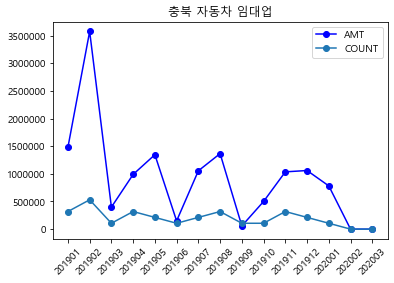

'\n4월 :\n7월 : \n'

In [143]:
i = 48
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['201905', '201906', '201907', '201908', '201909', '201911', '202003']


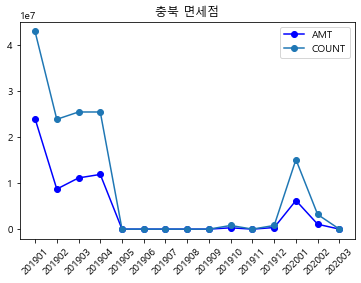

'\n4월 :\n7월 : \n'

In [144]:
i = 49
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['201902', '201903', '201910', '201911', '201912', '202001', '202002', '202003']


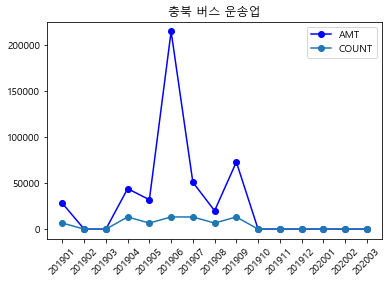

'\n4월 :\n7월 : \n'

In [145]:
i = 50
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['201901', '201902', '202002', '202003']


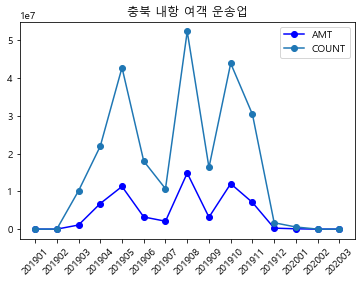

'\n4월 :\n7월 : \n'

In [146]:
i = 51
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''

<AMT인 년월>
['201901', '201902', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']


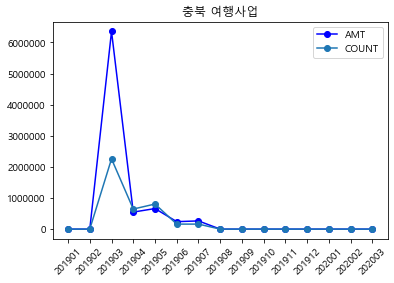

'\n4월 :\n7월 : \n'

In [147]:
i = 52
plot_city_clss_by_month(uncomplete_group[i][0], uncomplete_group[i][1], color = 'blue')

'''
4월 :
7월 : 
'''